In [585]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

warnings.filterwarnings('ignore')

In [586]:

data_path = 'D51_test/'
data = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

train_Y = data['poi']
ids = df_test['name']
df_train = data.drop(['email_address'], axis=1)
df_test = df_test.drop(['email_address'], axis=1)
df = pd.concat([df_train,df_test])
df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


# 資料前處理階段

### 檢查空值
##### 根據PDF描述沒有的資料都是為不填 不需要額外補值 所以只要補0即可

In [587]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [588]:
for col in df.columns:
    df[col].fillna(0, inplace=True)

In [589]:
#檢視相關係數
correlations = data.corr()['poi'].sort_values()

print('Most Positive Correlations:\n', correlations)

Most Positive Correlations:
 deferral_payments           -0.251548
deferred_income             -0.224654
from_messages               -0.126760
from_this_person_to_poi     -0.096864
to_messages                 -0.023047
shared_receipt_with_poi      0.120467
from_poi_to_this_person      0.127932
expenses                     0.136386
other                        0.225619
long_term_incentive          0.227805
bonus                        0.242170
restricted_stock             0.261102
total_payments               0.271335
salary                       0.371917
total_stock_value            0.443098
exercised_stock_options      0.591972
poi                          1.000000
loan_advances                1.000000
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64


In [590]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.387965e+05,-3.827622e+05,1.942249e+04,4.182736e+06,7.074827e+04,358.602740,38.226027,24.287671,1.149658e+06,6.646839e+05,5.854318e+05,1.749257e+06,2.051637e+04,3.658114e+05,692.986301,1221.589041,4.350622e+06,5.846018e+06
std,8.094029e+06,2.741325e+06,2.378250e+06,1.190543e+05,2.607040e+07,4.327163e+05,1441.259868,73.901124,79.278206,9.649342e+06,4.046072e+06,3.682345e+06,1.089995e+07,1.439661e+06,2.203575e+06,1072.969492,2226.770637,2.693448e+07,3.624681e+07
min,0.000000e+00,-1.025000e+05,-2.799289e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-2.604490e+06,-7.576788e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,-4.409300e+04
25%,0.000000e+00,0.000000e+00,-3.792600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,8.115000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,9.394475e+04,2.288695e+05
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,6.082935e+05,2.018200e+04,16.500000,2.500000,0.000000,0.000000e+00,0.000000e+00,9.595000e+02,3.605280e+05,0.000000e+00,2.105960e+05,102.500000,289.000000,9.413595e+05,9.659550e+05
75%,8.000000e+05,9.684500e+03,0.000000e+00,0.000000e+00,1.714221e+06,5.374075e+04,51.250000,40.750000,13.750000,0.000000e+00,3.750648e+05,1.506065e+05,8.145280e+05,0.000000e+00,2.708505e+05,893.500000,1585.750000,1.968287e+06,2.319991e+06
max,9.734362e+07,3.208340e+07,0.000000e+00,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [591]:
num_feature = []
for feature in df:
    if df[feature].dtype == 'float64' :
        num_feature.append(feature)

In [592]:
### 檢查個欄位是否有離群值

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F2ECF93C8>,
      dtype=object)

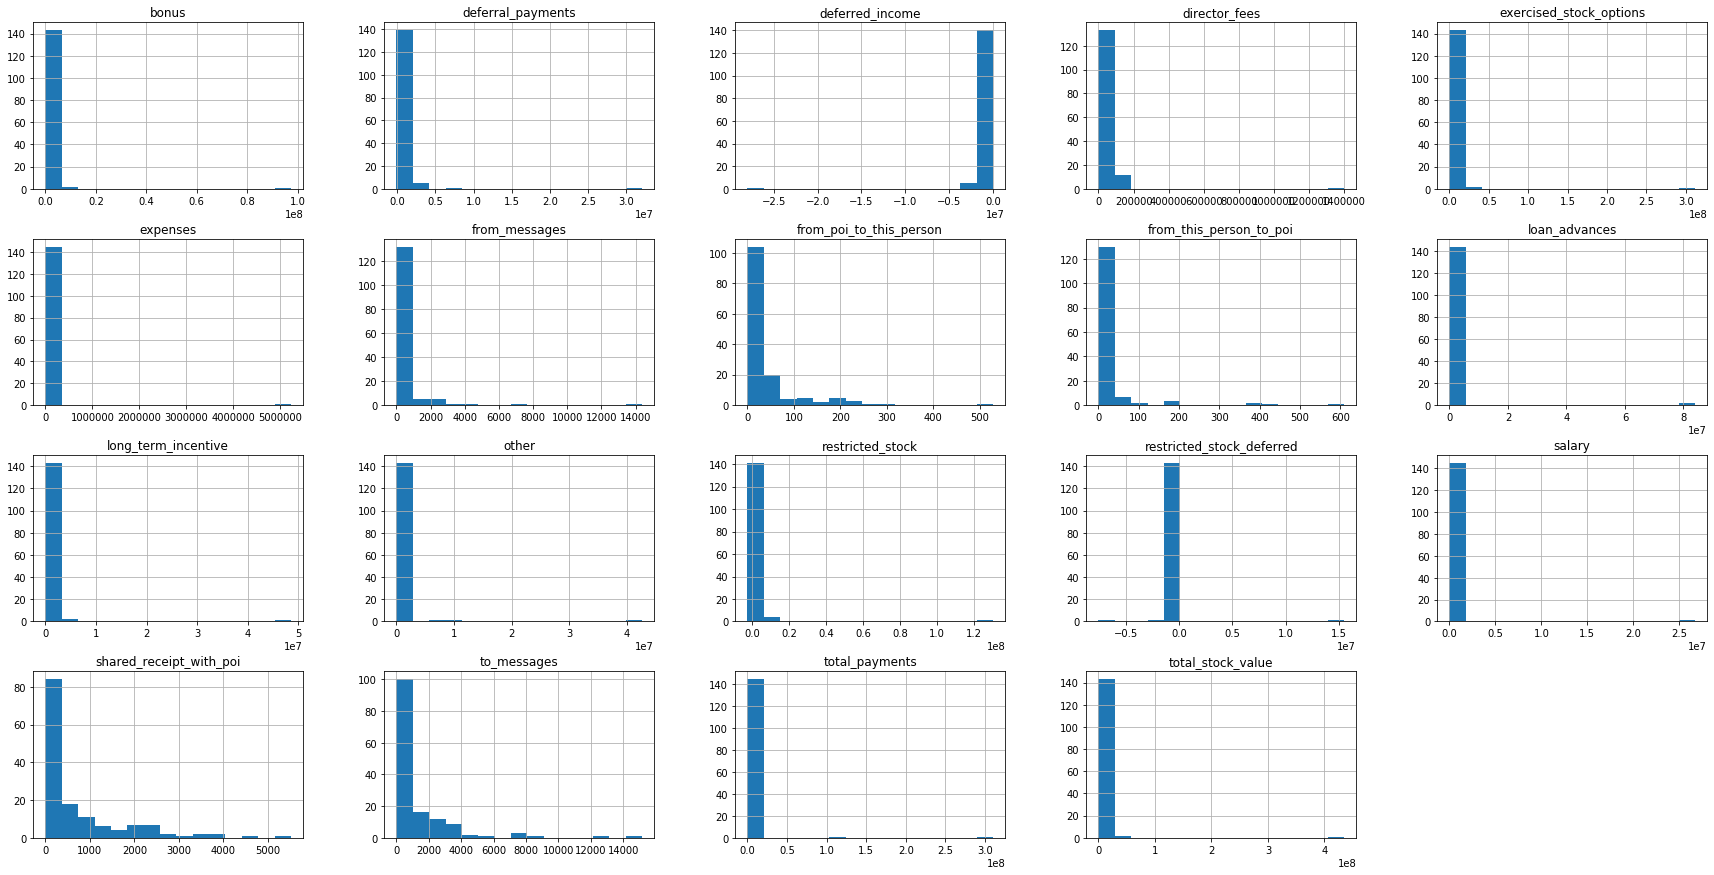

In [593]:
df[num_feature].hist(bins = 15, figsize=(30,15), layout=(4,5))

### 發現所有都有一筆資料異常的大 對其進行檢驗

In [594]:
print(df["salary"].max()) 
print(df["salary"].sum() - df["salary"].max())

#可以發現最大那筆是所有資料的總計 名稱是TOAL
df.loc[df['name'] == 'TOTAL']

26704229.0
26704229.0


,name,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
20,TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,0.0,0.0,0.0,...,48521928.0,42667589.0,0,130322299.0,-7576788.0,26704229.0,0.0,0.0,309886585.0,434509511.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F2EEDEB48>,
      dtype=object)

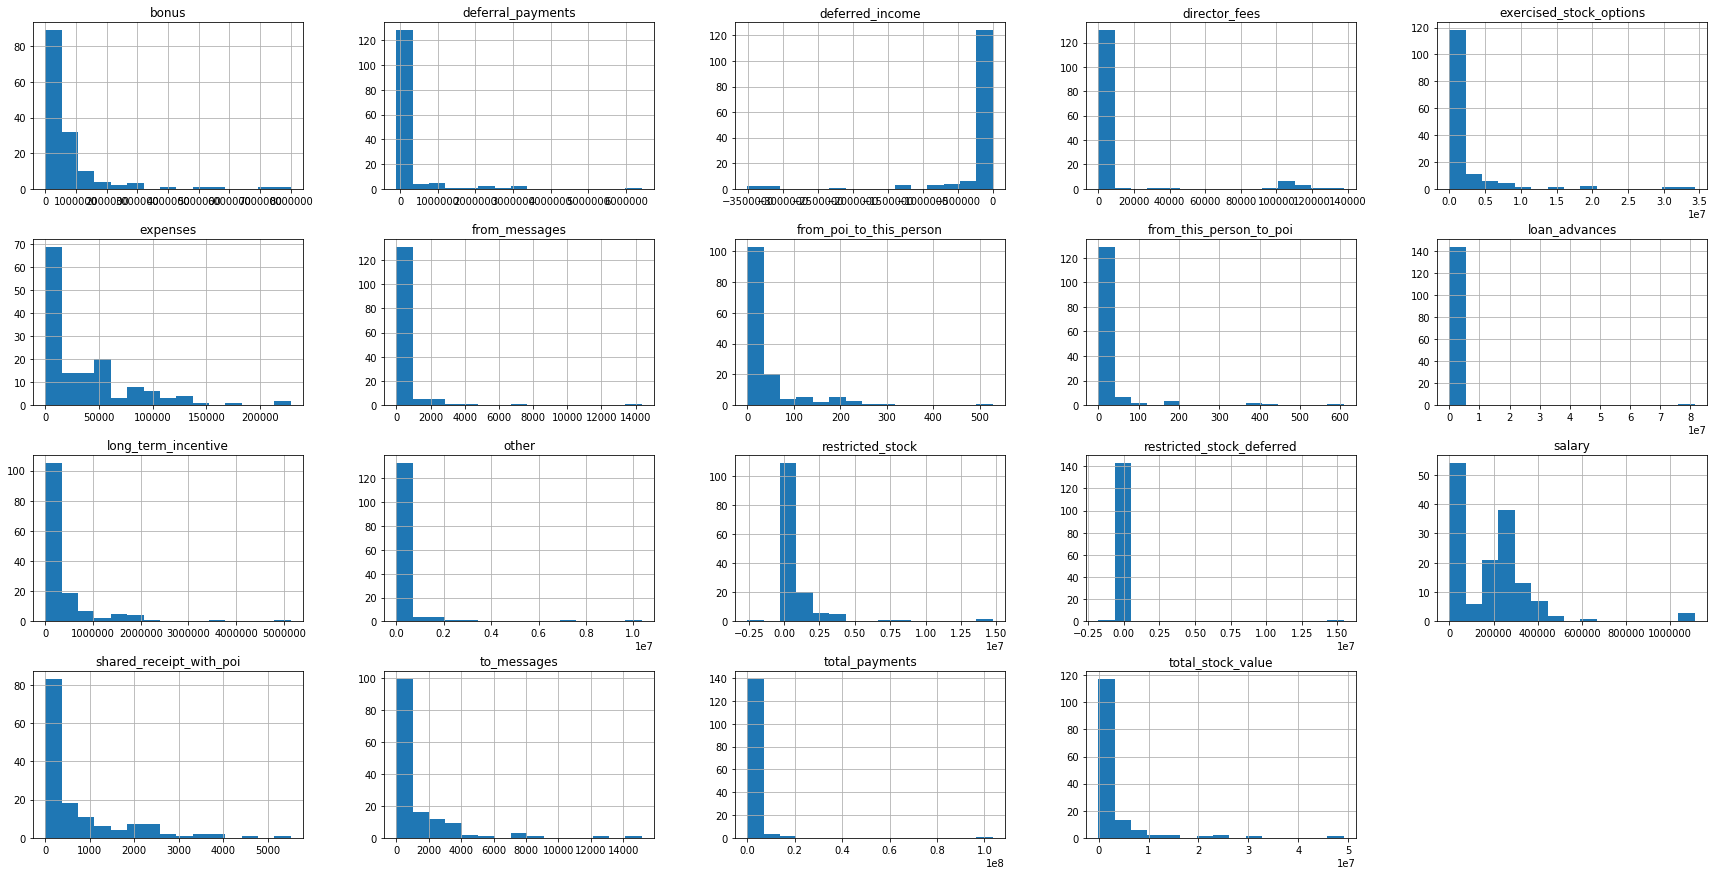

In [595]:
#刪除該筆資料 但之後要加回(預測需要)
#total_row = df[df["name"] == 'TOTAL']
df = df[df["name"] != 'TOTAL']
ids = df_test[df_test["name"] != 'TOTAL']
ids = ids["name"]
# 重跑長條圖
df[num_feature].hist(bins = 15, figsize=(30,15), layout=(4,5))

#### 把不同性質的欄位分組

In [596]:
#員工/股東的給付金額salary+bonus+long_term_incentive+deferred_income+deferral_payments+loan_advances+other+expenses+director_fees=total_payments
Payment_group=['salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees']

total_payment_group=['total_payments']

all_Payment_group=['name','salary','bonus','long_term_incentive','deferred_income','deferral_payments','loan_advances','other','expenses','director_fees','total_payments']

#股利exercised_stock_options+restricted_stock+restricted_stock_deferred=total_stock_value
stock_group=['exercised_stock_options','restricted_stock','restricted_stock_deferred']

total_stock_group=['total_stock_value']

all_stock_group=['name','exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value']

In [597]:
#驗證群組計算
print("payment sum:",data[Payment_group].iloc[0].sum())
print("totoal payment:",data[total_payment_group].iloc[0].sum())
print("stock sum:",data[stock_group].iloc[0].sum())
print("total stock:",data[total_stock_group].iloc[0].sum())

payment sum: 505050.0
totoal payment: 505050.0
stock sum: 22542539.0
total stock: 22542539.0


In [598]:
#根據群組計算找出Payment_group !=total_payment_group 和stock_group !=total_stock_group 就可能是有遺漏值
payment_missing_value = []
for index, row in df.iterrows():
    if (row[Payment_group].sum() != row[total_payment_group].sum()):
        payment_missing_value.append(row)
payment_missing_df=pd.DataFrame(payment_missing_value)
payment_missing_df[all_Payment_group]

,name,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
50,BELFER ROBERT,0.0,0.0,0.0,0.0,-102500.0,0.0,0.0,0.0,3285.0,102500.0
26,BHATNAGAR SANJAY,0.0,0.0,0.0,0.0,0.0,0.0,137864.0,0.0,137864.0,15456290.0


In [599]:
stock_missing_value = []
for index, row in df.iterrows():
    if (row[stock_group].sum() != row[total_stock_group].sum()):
        stock_missing_value.append(row)
stock_missing_df=pd.DataFrame(stock_missing_value)
stock_missing_df[all_stock_group]

,name,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
50,BELFER ROBERT,3285.0,0.0,44093.0,-44093.0
26,BHATNAGAR SANJAY,2604490.0,-2604490.0,15456290.0,0.0


##### 上面兩個方法可以發現這兩個都是股東(有director_fees) 因此salary和bonus為Nan為正常
##### 而根據安隆的PDF的描述 BELFER ROBERT和BHATNAGAR SANJAY資料有誤填因此做校對處理

In [600]:
df.iloc[50]['deferred_income'] = -102500
df.iloc[50]['deferral_payments'] = 0
df.iloc[50]['expenses'] = 3285
df.iloc[50]['director_fees'] = 102500
df.iloc[50]['total_payments'] = 3285
df.iloc[50]['exercised_stock_options'] = 0
df.iloc[50]['restricted_stock'] = 44093
df.iloc[50]['restricted_stock_deferred'] = -44093
df.iloc[50]['total_stock_value'] = 0

df.iloc[26]['total_payments'] =137864
df.iloc[26]['expenses'] =137864
df.iloc[26]['other'] = 0
df.iloc[26]['director_fees'] = 0
df.iloc[26]['exercised_stock_options'] = 15456290
df.iloc[26]['restricted_stock'] = 2604490
df.iloc[26]['restricted_stock_deferred'] = -2604490
df.iloc[26]['total_stock_value'] = 15456290

df = df.drop(['name'], axis=1)

### 特徵組合

#### email的to_messages和from_poi_to_this_person以及from_messages和from_this_person_to_poi
#### 可以計算與poi互動的比例 比例越高者被判為poi的機率應該越高

In [601]:
#email次數(email_address排除)
to_email_group=['to_messages', 'from_poi_to_this_person','msg_from_poi_ratio']

form_email_group=['from_messages', 'from_this_person_to_poi','msg_to_poi_ratio']

all_email_group=['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi','msg_from_poi_ratio','msg_to_poi_ratio']


In [602]:
df['msg_from_poi_ratio'] = (df['from_poi_to_this_person'] / df['to_messages'])
df['msg_to_poi_ratio'] = (df['from_this_person_to_poi'] / df['from_messages'])
df['msg_from_poi_ratio'].fillna(0, inplace=True)
df['msg_to_poi_ratio'].fillna(0, inplace=True)
df[all_email_group]

,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,msg_from_poi_ratio,msg_to_poi_ratio
0,905.0,42.0,18.0,4.0,864.0,0.046409,0.222222
1,3627.0,88.0,108.0,30.0,2042.0,0.024262,0.277778
2,225.0,13.0,39.0,14.0,91.0,0.057778,0.358974
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,2598.0,199.0,144.0,25.0,2188.0,0.076597,0.173611
...,...,...,...,...,...,...,...
28,1607.0,23.0,40.0,8.0,1336.0,0.014312,0.200000
29,3187.0,28.0,92.0,23.0,2103.0,0.008786,0.250000
30,169.0,0.0,12.0,0.0,23.0,0.000000,0.000000
31,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


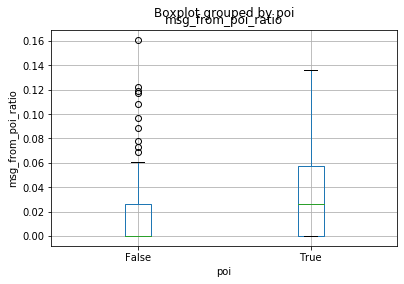

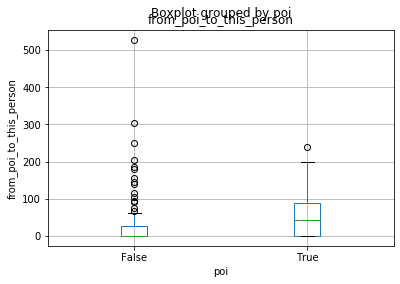

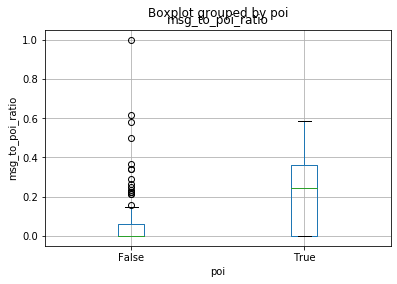

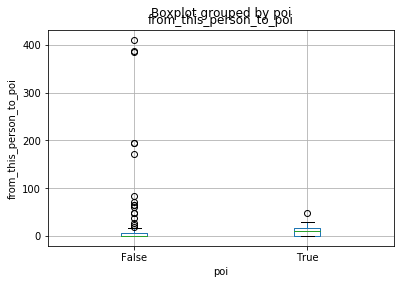

In [603]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

#檢驗與poi的關係
df_temp = train_X[['poi', 'msg_from_poi_ratio']]
df_temp.boxplot(by = 'poi')
plt.ylabel('msg_from_poi_ratio')
plt.xlabel('poi')
plt.show()

df_temp = train_X[['poi', 'from_poi_to_this_person']]
df_temp.boxplot(by = 'poi')
plt.ylabel('from_poi_to_this_person')
plt.xlabel('poi')
plt.show()


df_temp = train_X[['poi', 'msg_to_poi_ratio']]
df_temp.boxplot(by = 'poi')
plt.ylabel('msg_to_poi_ratio')
plt.xlabel('poi')
plt.show()


df_temp = train_X[['poi', 'from_this_person_to_poi']]
df_temp.boxplot(by = 'poi')
plt.ylabel('from_this_person_to_poi')
plt.xlabel('poi')
plt.show()

In [604]:
#因為已經取radio可以拿掉to_messages跟from_messages
df = df.drop(['to_messages','from_messages'], axis=1)

In [605]:
#拿掉poi
df = df.drop(['poi'], axis=1)
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,total_payments,total_stock_value,msg_from_poi_ratio,msg_to_poi_ratio
0,1750000.0,0.0,-3504386.0,0.0,19794175.0,46950.0,42.0,4.0,0.0,1617011.0,174839.0,2748364.0,0.0,420636.0,864.0,505050.0,22542539.0,0.046409,0.222222
1,5600000.0,0.0,0.0,0.0,19250000.0,29336.0,88.0,30.0,0.0,1920000.0,22122.0,6843672.0,0.0,1111258.0,2042.0,8682716.0,26093672.0,0.024262,0.277778
2,200000.0,0.0,-4167.0,0.0,1624396.0,22884.0,13.0,14.0,0.0,0.0,1573324.0,869220.0,0.0,211844.0,91.0,2003885.0,2493616.0,0.057778,0.358974
3,800000.0,0.0,0.0,0.0,0.0,118134.0,0.0,0.0,0.0,602671.0,907502.0,985032.0,0.0,224305.0,0.0,2652612.0,985032.0,0.000000,0.000000
4,1250000.0,0.0,-262500.0,0.0,0.0,35818.0,199.0,25.0,0.0,375304.0,486.0,126027.0,0.0,240189.0,2188.0,1639297.0,126027.0,0.076597,0.173611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1000000.0,0.0,0.0,0.0,1465734.0,38559.0,23.0,8.0,0.0,369721.0,425688.0,378082.0,0.0,213625.0,1336.0,2047593.0,1843816.0,0.014312,0.200000
29,1500000.0,0.0,0.0,0.0,1835558.0,0.0,28.0,23.0,0.0,554422.0,1852186.0,1293424.0,0.0,428780.0,2103.0,4335388.0,3128982.0,0.008786,0.250000
30,0.0,504610.0,0.0,0.0,2218275.0,0.0,0.0,0.0,0.0,461912.0,0.0,0.0,0.0,0.0,23.0,966522.0,2218275.0,0.000000,0.000000
31,200000.0,204075.0,0.0,0.0,2549361.0,57727.0,0.0,0.0,0.0,175000.0,2630.0,514847.0,0.0,236457.0,0.0,875889.0,3064208.0,0.000000,0.000000


In [606]:
### 特徵選擇

In [607]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import train_test_split
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25, random_state=44)

kbest = SelectKBest(score_func=f_classif, k=5)
X_new = kbest.fit_transform(train_X, train_Y)

kbest_df = pd.DataFrame(data = list(zip(df[1:], kbest.scores_)), columns=['Feature', 'Score'])
kbest_df

,Feature,Score
0,bonus,10.389644
1,deferral_payments,0.861674
2,deferred_income,5.754414
3,director_fees,1.558013
4,exercised_stock_options,31.814679
5,expenses,7.709564
6,from_poi_to_this_person,1.944148
7,from_this_person_to_poi,0.300858
8,loan_advances,8.175190
9,long_term_incentive,5.515237


In [608]:
#選出分數>10的欄位出來

feature=kbest_df[kbest_df['Score']>10]['Feature']

df = df[feature]
df

,bonus,exercised_stock_options,salary,total_stock_value,msg_to_poi_ratio
0,1750000.0,19794175.0,420636.0,22542539.0,0.222222
1,5600000.0,19250000.0,1111258.0,26093672.0,0.277778
2,200000.0,1624396.0,211844.0,2493616.0,0.358974
3,800000.0,0.0,224305.0,985032.0,0.000000
4,1250000.0,0.0,240189.0,126027.0,0.173611
...,...,...,...,...,...
28,1000000.0,1465734.0,213625.0,1843816.0,0.200000
29,1500000.0,1835558.0,428780.0,3128982.0,0.250000
30,0.0,2218275.0,0.0,2218275.0,0.000000
31,200000.0,2549361.0,236457.0,3064208.0,0.000000


In [609]:
#標準化
from sklearn.preprocessing import MinMaxScaler
df = MinMaxScaler().fit_transform(df)

In [610]:
from sklearn.model_selection import train_test_split
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.25, random_state=44)

### 建立模型

In [611]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score, classification_report
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  
from scipy.stats import truncnorm
import random

In [612]:
#超參數調校
lr = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gdbc = GradientBoostingClassifier()

#參數組合
lr_params = {} 
lr_params["C"] =  [0.01,0.05, 0.1,5, 10]
lr_params["fit_intercept"] =  [True, False]
lr_params["warm_start"] = [True,False]
lr_params["penalty"] = ["l2"]

knn_params = {}
knn_params["n_neighbors"] = range(1, 31)
knn_params["weights"] = ['uniform', 'distance']

tree_params = {}
tree_params["class_weight"] = ["balanced"]
tree_params["max_depth"] = [None,3,4,5,6,7,8,9,10]
tree_params["min_samples_leaf"] = [1, 2, 3, 4,5]
tree_params["criterion"] = ["gini", "entropy"]

rf_params = {}
rf_params["n_estimators"] =  [10,20,50,100,150,200,300]
rf_params["max_depth"] = [None,3,4,5,6,7,8,9,10]
rf_params["min_samples_split"] = [1,2, 3, 4, 5,6,7,8,9,10]
rf_params["min_samples_leaf"] = [1, 2, 3, 4,5,6,7,8,9,10,15,20]

gdbc_params = {}
gdbc_params["learning_rate"] = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2,0.5,1]
gdbc_params["subsample"] = [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]
gdbc_params["n_estimators"] = [10,20,50,100,150,200,300]
gdbc_params["max_depth"] = [None,3,4,5,6,7]
gdbc_params["min_samples_split"] = [1,2, 3, 4, 5,10]
gdbc_params["min_samples_leaf"] = [1, 2, 3, 4,5]



In [613]:
#參數搜尋
def randomSearchCV_best_params(model, params, train_X, train_Y) :
    rand_result = RandomizedSearchCV(model, params,cv=5,n_iter=300,n_jobs=-1, verbose=1, scoring="accuracy")
    rand_result.fit(train_X, train_Y)
    # Results from Random Search
    print("\n========================================================")
    print(" Results from Random Search " )
    print("========================================================")    
    print("\n The best estimator across ALL searched params:\n",rand_result.best_estimator_) 
    print("\n The best score across ALL searched params:\n",rand_result.best_score_)
    print("\n The best parameters across ALL searched params:\n",rand_result.best_params_)
    return rand_result


In [614]:
# LogisticRegression
lr = randomSearchCV_best_params(lr, lr_params, x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:,1]
acc = accuracy_score(y_test, y_pred)
print("Accuracy score: {}".format(acc))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {}".format(auc))
print("Classification Report: {}".format(y_test, y_pred))
    
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': lr_pred})
#因為有一筆toal資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub=sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_lr_pred.csv', index=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Results from Random Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

 The best score across ALL searched params:
 0.9286764705882353

 The best parameters across ALL searched params:
 {'warm_start': True, 'penalty': 'l2', 'fit_intercept': True, 'C': 10}
Accuracy score: 0.8275862068965517
F1 score: 0.0
AUC: 0.7400000000000001
Classification Report: 26     False
42     False
70     False
58     False
46     False
19     False
9       True
62     False
109    False
47     False
6       True
7       True
91     False
24     False
52     False
98     False
105    False
38     False
104    False
112  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [615]:
# KNeighborsClassifier
knn = randomSearchCV_best_params(knn, knn_params, x_train, y_train)
'''
knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
'''
#knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))
print("Classification Report: {}".format(y_test, y_pred))
knn.fit(train_X, train_Y)
knn_pred = knn.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': knn_pred})
#因為有一筆toal資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub=sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_knn_pred.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s



 Results from Random Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

 The best score across ALL searched params:
 0.9169117647058824

 The best parameters across ALL searched params:
 {'weights': 'uniform', 'n_neighbors': 2}
Accuracy score: 0.8275862068965517
F1 score: 0.0
AUC: 0.84
Classification Report: 26     False
42     False
70     False
58     False
46     False
19     False
9       True
62     False
109    False
47     False
6       True
7       True
91     False
24     False
52     False
98     False
105    False
38     False
104    False
112    False
48     False
76     False
78     False
75     False
77     False
33     False
27     False
41     False
11      True
Name: poi, dtype: bool
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


In [616]:
# DecisionTreeClassifier 比現比較差 可以排除
tree = randomSearchCV_best_params(tree, tree_params, x_train, y_train)

y_pred = tree.predict(x_test)
y_pred_proba = tree.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))
print("Classification Report: {}".format(y_test, y_pred))
tree.fit(train_X, train_Y)
tree_pred = tree.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': tree_pred})
#因為有一筆toal資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_tree_pred.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s



 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 The best score across ALL searched params:
 0.8801470588235294

 The best parameters across ALL searched params:
 {'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'gini', 'class_weight': 'balanced'}
Accuracy score: 0.5862068965517241
F1 score: 0.25
AUC: 0.5499999999999999
Classification Report: 26     False
42     False
70     False
58     False
46     False
19     False
9       True
62     False
109    False
47     False
6       True
7       True
91     False
24     False
52    

[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    0.3s finished


In [617]:
# RandomForestClassifier
rf = randomSearchCV_best_params(rf, rf_params, x_train, y_train)

y_pred = rf.predict(x_test)
y_pred_proba = rf.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))
print("Classification Report: {}".format(y_test, y_pred))
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': rf_pred})
#因為有一筆toal資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_rf_pred.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 1485 out of 1500 | elapsed:   55.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   56.5s finished



 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9404411764705882

 The best parameters across ALL searched params:
 {'n_estimators': 150, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_depth': 6}
Accuracy score: 0.7931034482758621
F1 score: 0.0
AUC: 0.6749999999999999
Classification Report: 26     False
42     False
70     False
58     False
46     False
19     False
9

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 1282 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.1min finished


In [618]:
# GradientBoostingClassifier

gdbc = randomSearchCV_best_params(gdbc, gdbc_params, x_train, y_train)
'''
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.618, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
'''
y_pred = gdbc.predict(x_test)
y_pred_proba = gdbc.predict_proba(x_test)[:,1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))
print("Classification Report: {}".format(y_test, y_pred))

gdbc.fit(train_X, train_Y)
gdbc_pred = gdbc.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': gdbc_pred})
#因為有一筆toal資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_gdbc_pred.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 1384 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1485 out of 1500 | elapsed:   22.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   22.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.618, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.9404411764705882

 The best parameters across ALL searched params:
 {'subsample': 0.618, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 4, 

[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 1485 out of 1500 | elapsed:   22.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   22.7s finished


In [619]:
# StackingClassifier knn跟dt可以考慮不加入
meta_estimator = GradientBoostingClassifier(tol=0.001, subsample=0.7, n_estimators=200, max_depth=2, learning_rate=0.1)
stacking = StackingClassifier(classifiers=[lr, knn,rf,gdbc], meta_classifier=meta_estimator, use_probas=True, average_probas=False)
stacking.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_proba = stacking.predict_proba(x_test)[:, 1]
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_proba)))
print("Classification Report: {}".format(y_test, y_pred))

stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict_proba(test_X)[:,1]

sub = pd.DataFrame({'name': ids, 'poi': stacking_pred})
#因為有一筆toal資料需要補回
total_row = {"name":"TOTAL",'poi': 0}
sub = sub.append(total_row,ignore_index=True)
sub.to_csv('D51_D53_stacking_pred.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.1min finished


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 1485 out of 1500 | elapsed:   24.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   24.8s finished


Accuracy score: 0.896551724137931
F1 score: 0.4
AUC: 0.45
Classification Report: 26     False
42     False
70     False
58     False
46     False
19     False
9       True
62     False
109    False
47     False
6       True
7       True
91     False
24     False
52     False
98     False
105    False
38     False
104    False
112    False
48     False
76     False
78     False
75     False
77     False
33     False
27     False
41     False
11      True
Name: poi, dtype: bool
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1192 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1485 out of 1500 | elapsed:   24.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   24.9s finished


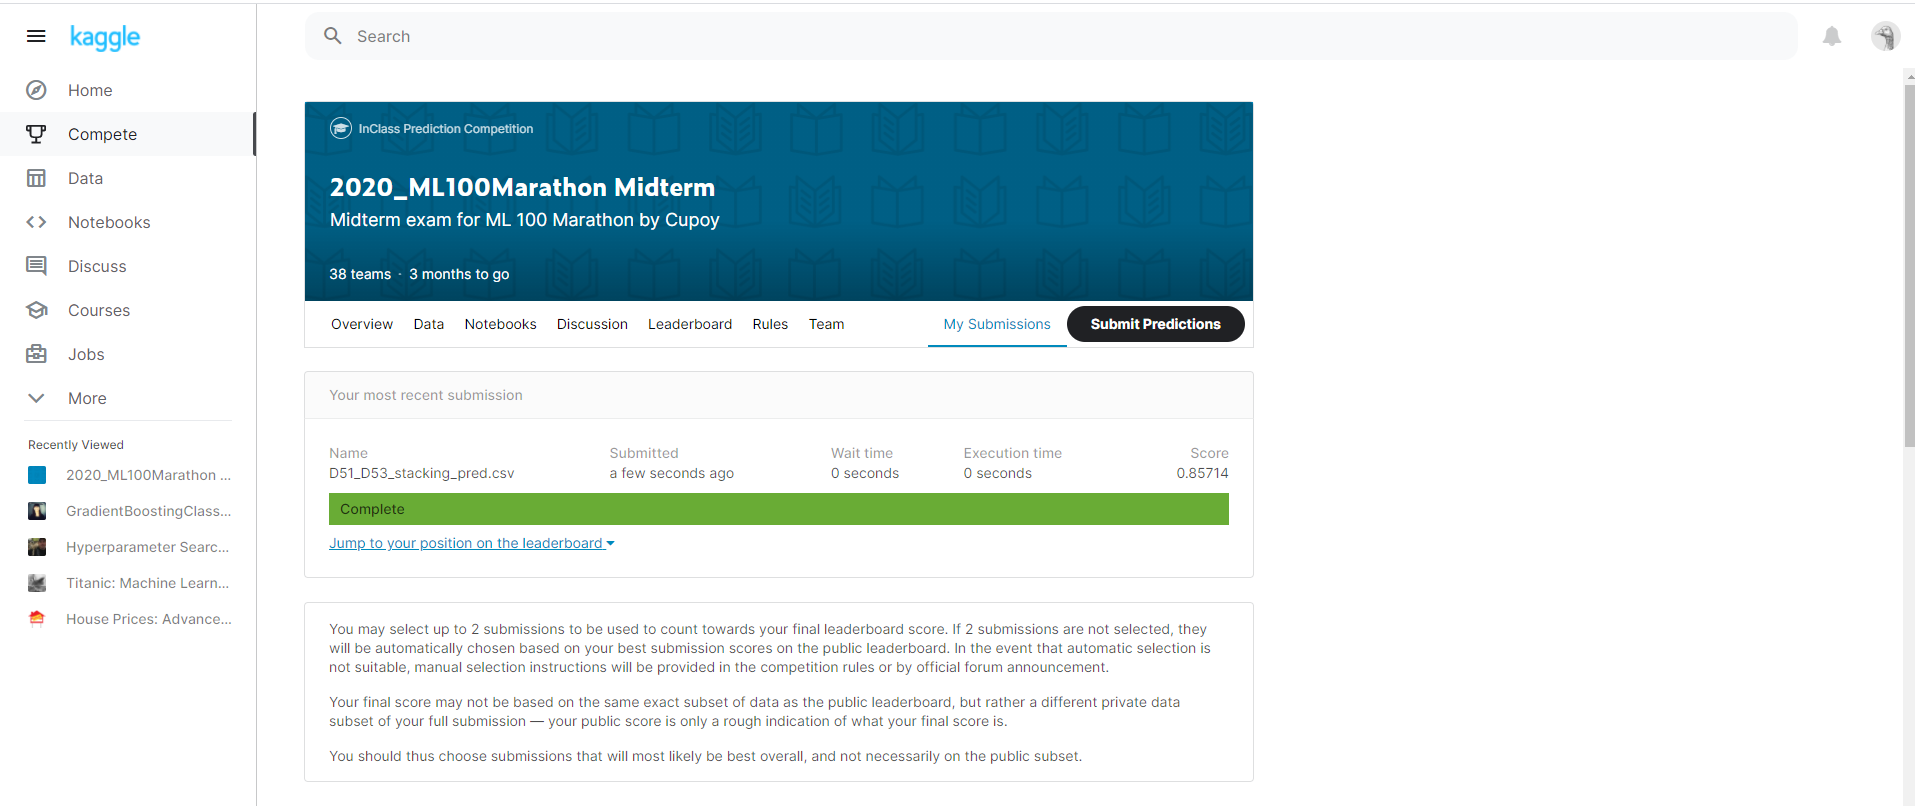

In [620]:
from IPython.display import Image
Image("2020_ML100Marathon_Midtern.png")